# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded. 


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

## Question 1.1 -- Regression as minimization

Derive the closed form solution for 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

*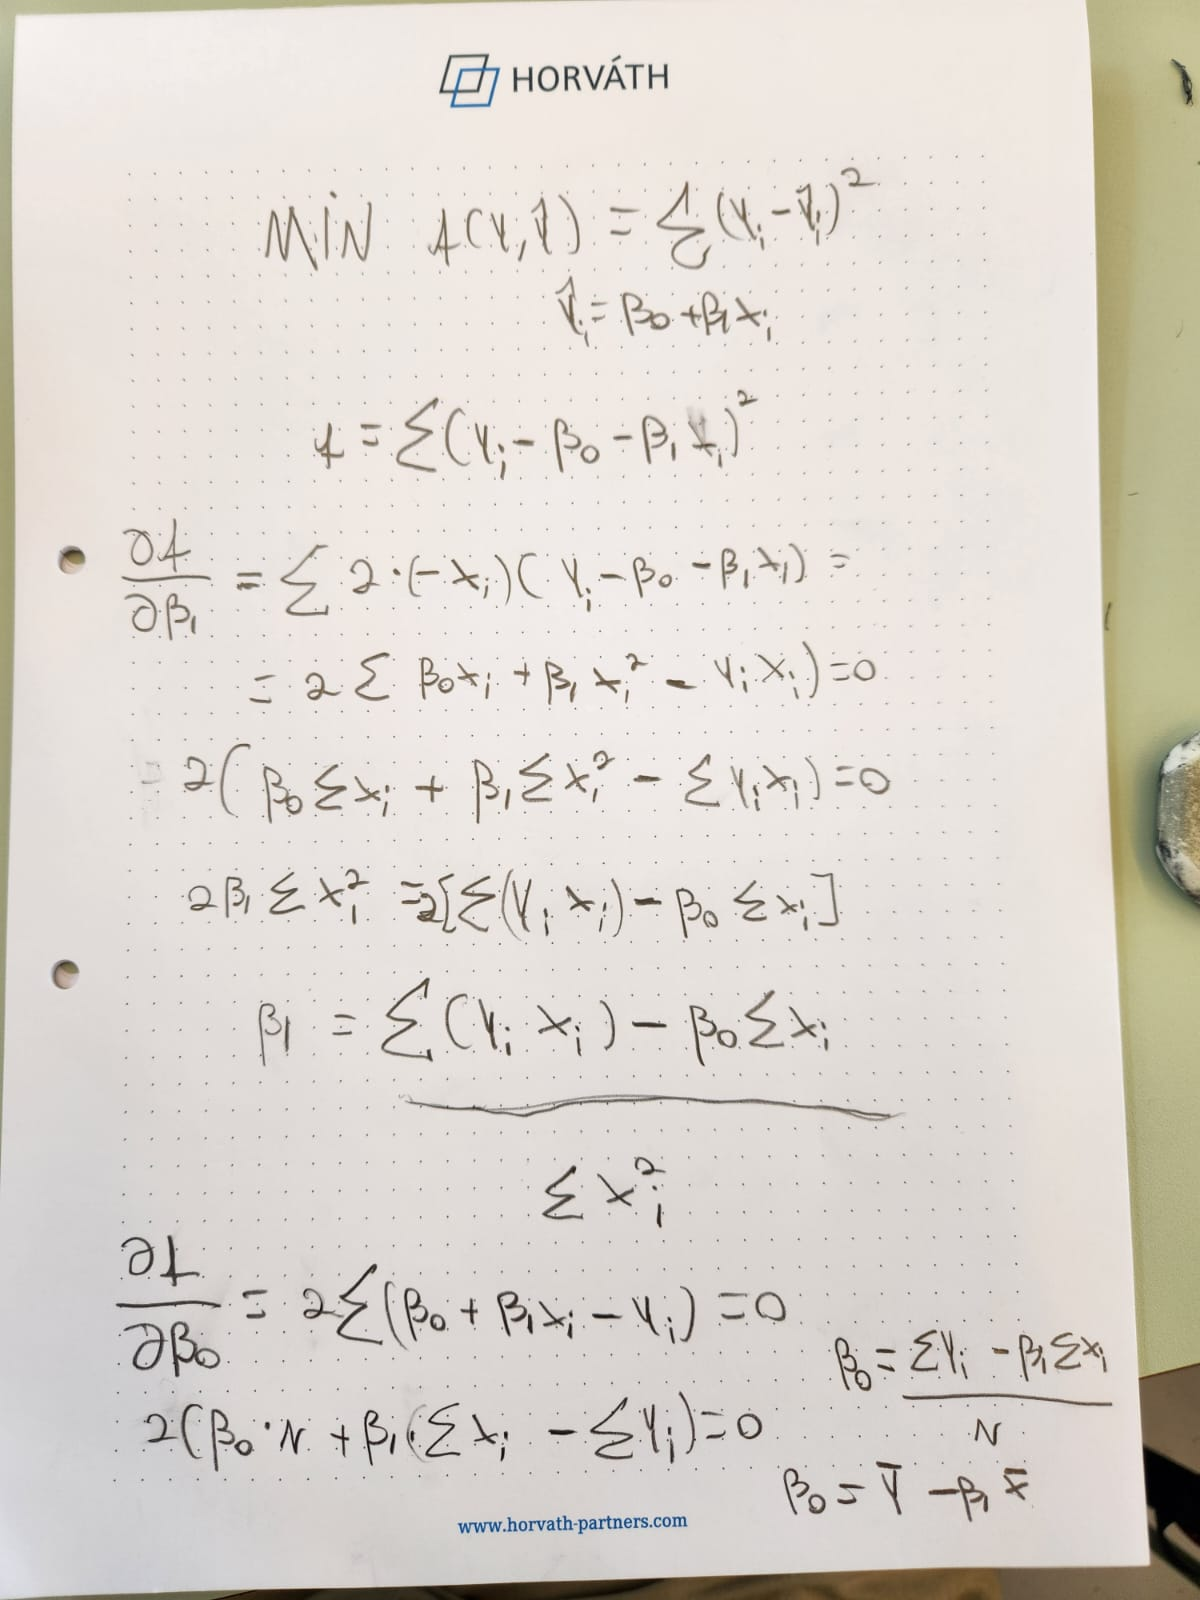*

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not? 

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

*There only one solution for A and B that minimize the sum of least squares. As it is a closed-form solution, their solution can be logically inferred and mathematically proven.*

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

*Using mean squared error would not lead to a different error, since the formula is the same, but MSE divides the sum of squared errors by the size of the sample*

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it! 
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
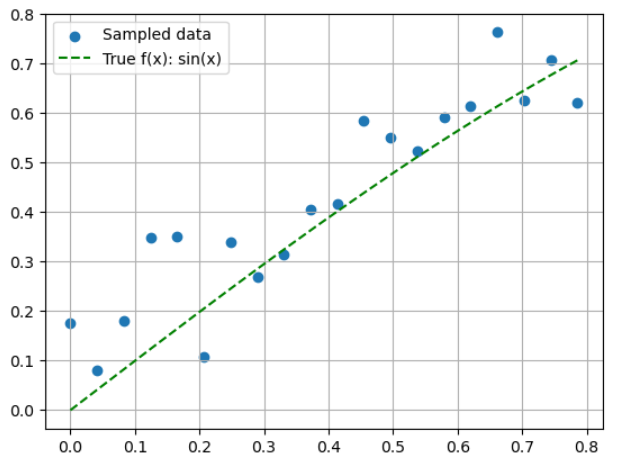

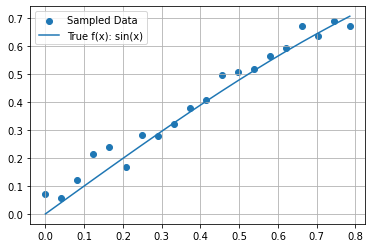

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random


np.random.seed(0)

def generate_sin(x, epsilon):
    x_array = np.array(x) 
    u = np.random.normal(0, epsilon, len(x_array))
    y_array = np.sin(x_array) + u
    return list(y_array)

n_samples = np.linspace(0, (np.pi/4), num=20, endpoint=True)
#I forgot to set e = 0.1 ops. Just saw it now after finishing the whole assigment.
# TODO: create noisy function
x = n_samples
y = generate_sin(x, 0.04)

# TODO: create true function
x_pure = n_samples
y_pure = np.sin(x_pure)

# TODO: plot data, line 
plt.scatter(x,y, label="Sampled Data")
plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

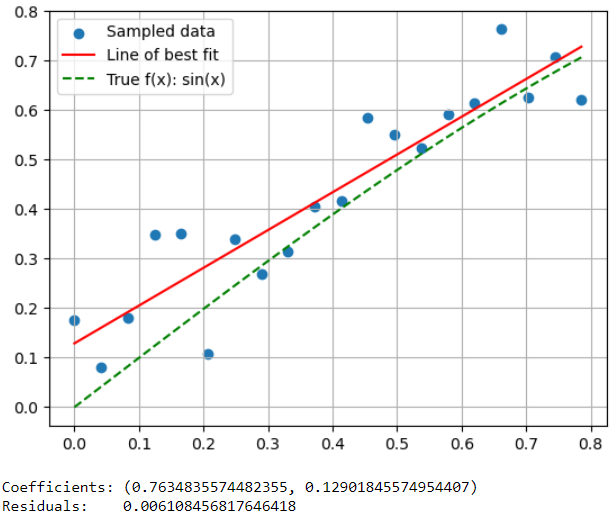

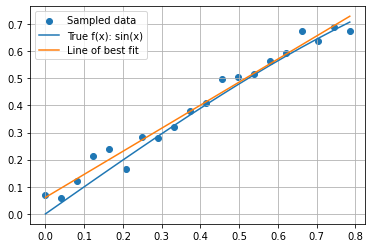

Coefficients: (0.06074160451749644, 0.8503612132546315)
Residuals:    0.021020269589392022
the line of best fit gets gets close to the true function, altough with some error.


In [33]:
def compute_sos(y_true, y_pred):
    errors_array = np.array(y_true - y_pred)
    squared_errors_array = errors_array**2
    sos = np.sum(squared_errors_array)
    return sos

def lin_reg(xs, ys):
    x_variance = np.var(xs, ddof=1)#
    xy_covariance = np.cov(xs, ys, ddof=1)[0, 1]#
    b = xy_covariance/x_variance
    #Before, I was using Cov(x,y)/Var(x) for B1, hence the part above.
    #b = np.sum((xs-np.mean(xs))*(ys-np.mean(ys)))/np.sum((xs-np.mean(xs))**2)
    a = np.mean(ys) - (b * np.mean(xs))
    y_pred = a + b*xs
    res = compute_sos(ys, y_pred)
    return a, b, res


# TODO: generate line of best fit
a, b, res = lin_reg(x, y)
y_best = a+x*b


# TODO: plot line of best fit, data, etc
plt.scatter(x, y, label="Sampled data")
plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.plot(x, y_best, label="Line of best fit")

# make it pretty
plt.grid(visible=bool, which='major', axis='both')
plt.legend()
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)

print("the line of best fit gets gets close to the true function, altough with some error.")

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

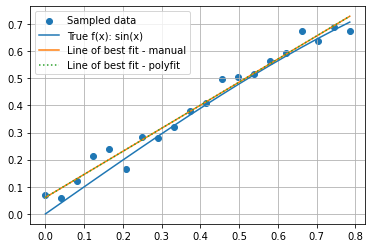

Coefficients:      (0.06074160451749644, 0.8503612132546315)
Residuals:         0.021020269589392022
Coefficients (np): (0.060741604517496474, 0.8503612132546314)
Residuals (np):    0.021020269589392005


In [34]:
# TODO: use np polyfit here

def lin_reg_poly(xs, ys):
    coefficients = np.polyfit(xs, ys, 1)
    b_np = coefficients[0]
    a_np = coefficients[1]
    y_predpoly = np.array(a_np + b_np*xs)
    res_np = compute_sos(ys, y_predpoly)
    return a_np, b_np, res_np

a_np, b_np, res_np = lin_reg_poly(x, y)
y_best_np = a_np + b_np*x

# TODO: plot everything you need to
plt.scatter(x, y, label="Sampled data")
plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.plot(x, y_best, label="Line of best fit - manual")
plt.plot(x, y_best_np, label="Line of best fit - polyfit", linestyle='dotted')


plt.grid(visible=bool, which='major', axis='both')
plt.legend()
plt.show()

# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)



*They yielded the same results for me. Therefore, I assume polyfit uses the same formulas for its coefficients as I used in my original function.*

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors. 

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before. 
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

Coefficients:  (0.06074160451749644, 0.8503612132546315)
Train loss:    0.0010510134794696011
Test loss:     0.0024313838413229714


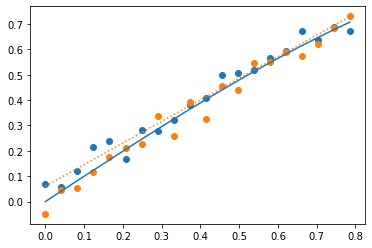

In [38]:
def compute_mse(xs, ys, ac, bc):
    y_pred = a + b*xs
    errors_array = ys - y_pred
    squared_errors_array = errors_array**2
    sos = np.sum(squared_errors_array)
    n = len(xs)
    mse = sos/n
    return mse

x_test = np.linspace(0, (np.pi/4), num=20, endpoint=True)
y_test = generate_sin(x_test, 0.04)

plt.scatter(x, y, label="Train set)")
plt.scatter(x_test, y_test, label="Test set")
plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.plot(x, y_best_np, label="Line of best fit - polyfit", linestyle='dotted')




test_loss = compute_mse(x_test, y_test, a, b)
train_loss = compute_mse(x, y, a, b)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

*The losses for the train set should be lower, as the data was trained aiming at minimizing the loss for those observations. Indeed, the train loss is lower because.*

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

Coefficients:  (0.01348936281057741, 0.9174834004720477)
Train loss:    0.0023866346086921166
Test loss:     0.002289403486910117
Coefficients:  (0.014915232827150628, 0.9131291193079402)
Train loss:    0.01096598619539487
Test loss:     0.010573175341432851


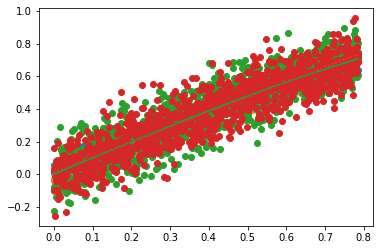

In [40]:
#TEST WITH MORE OBS#
n_samples2 = np.linspace(0, (np.pi/4), num=1000, endpoint=True)
x2 = n_samples2
y2 = generate_sin(x2, 0.04)


# TODO: create true function
x_pure2 = n_samples2
y_pure2 = np.sin(x_pure2)


a_np2, b_np2, res_np2 = lin_reg_poly(x2, y2)
y_best_np2 = a_np2 + b_np2*x2

x_test2 = np.linspace(0, (np.pi/4), num=1000, endpoint=True)
y_test2 = generate_sin(x_test2, 0.04)

plt.scatter(x2, y2, label="Train set)")
plt.scatter(x_test2, y_test2, label="Test set")
plt.plot(x_pure2, y_pure2, label="True f(x): sin(x)")
plt.plot(x2, y_best_np2, label="Line of best fit - polyfit", linestyle='dotted')




test_loss2 = compute_mse(x_test2, y_test2, a_np2, b_np2)
train_loss2 = compute_mse(x2, y2, a_np2, b_np2)

print("Coefficients: ", (a_np2, b_np2))
print("Train loss:   ", train_loss2)
print("Test loss:    ", test_loss2)

#TEST WITH MORE NOISE#
n_samples3 = np.linspace(0, (np.pi/4), num=1000, endpoint=True)
x3 = n_samples3
y3 = generate_sin(x2, 0.1)


# TODO: create true function
x_pure3 = n_samples3
y_pure3 = np.sin(x_pure3)


a_np3, b_np3, res_np3 = lin_reg_poly(x3, y3)
y_best_np3 = a_np3 + b_np3*x3

x_test3 = np.linspace(0, (np.pi/4), num=1000, endpoint=True)
y_test3 = generate_sin(x_test3, 0.1)

plt.scatter(x3, y3, label="Train set)")
plt.scatter(x_test3, y_test3, label="Test set")
plt.plot(x_pure3, y_pure3, label="True f(x): sin(x)")
plt.plot(x3, y_best_np3, label="Line of best fit - polyfit", linestyle='dotted')




test_loss3 = compute_mse(x_test2, y_test3, a_np3, b_np3)
train_loss3 = compute_mse(x3, y3, a_np3, b_np3)

print("Coefficients: ", (a_np3, b_np3))
print("Train loss:   ", train_loss3)
print("Test loss:    ", test_loss3)

*As N increases, the difference between the train loss and test loss decreases
As the noise increases, the difference between the train loss and test loss increases.*

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

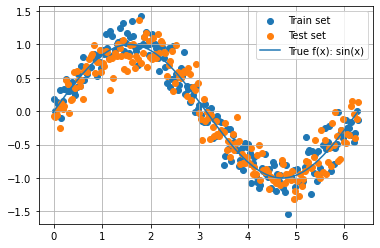

In [81]:
# TODO: generate new data and plot
n_samples = np.linspace(0, (np.pi*2), num=200, endpoint=True)
x = n_samples
y_train = generate_sin(x, 0.2)
y_test = generate_sin(x, 0.2)

x_pure = n_samples
y_pure = np.sin(x)

plt.scatter(x, y_train, label="Train set")
plt.scatter(x, y_test, label="Test set")

plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [82]:
d_range = range(1, 21)
n_obs = len(x)
MSE_list = []
for d in d_range:
    y_pred = np.polyval(np.polyfit(x, y_train, d), x)
    MSE = np.sum((y_train - y_pred)**2) / n_obs
    MSE_list.append(MSE)
    
print(MSE_list)
print(len(MSE_list))
    
    

[0.23482793106829924, 0.2348215292756356, 0.03984941182361261, 0.03940986802811077, 0.032128448999955345, 0.0320442780893025, 0.031691279280448376, 0.03161327598900915, 0.03148249928631046, 0.03143402384747217, 0.03143400930162041, 0.03142929563686892, 0.0314251104628048, 0.03132099795481682, 0.03126644560483098, 0.031110503584372787, 0.031069198201811005, 0.030990326276114734, 0.03099926440863483, 0.0310090993820396]
20


C:\Users\caiol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\caiol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

*This warning indicates that OLS is not well conditioned to deal with the data, which tends to happen when the degree of the polynomial is too large.

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

C:\Users\caiol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


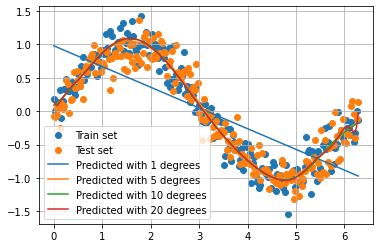

In [83]:
d_rangetest = [1, 2, 3, 5, 10, 20]
predicted_list = []

for d in d_rangetest:
    y_pred = np.polyval(np.polyfit(x, y_train, d), x)
    predicted_list.append(y_pred)
    

predd1 = predicted_list[0]
predd2 = predicted_list[1]
predd3 = predicted_list[2]
predd5 = predicted_list[3]
predd10 = predicted_list[4]
predd20 = predicted_list[5]



plt.scatter(x, y_train, label="Train set")
plt.scatter(x, y_test, label="Test set")

plt.plot(x, predd1, label="Predicted with 1 degrees")
plt.plot(x, predd5, label="Predicted with 5 degrees")
plt.plot(x, predd10, label="Predicted with 10 degrees")
plt.plot(x, predd20, label="Predicted with 20 degrees")
plt.grid()
plt.legend()
plt.show()



Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

C:\Users\caiol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\caiol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


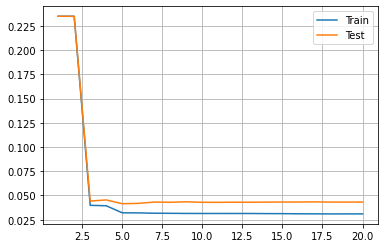

In [86]:

Train_loss = []
Test_loss = []
#for r in predicted_list:
    #MSE_train = np.sum((y_train - r)**2) / n_obs
    #Train_loss.append(MSE_train)
    #MSE_test = np.sum((y_test - r)**2) / n_obs
    #Test_loss.append(MSE_test)
    

predicted_list_full = []

for d in d_range:
    y_pred = np.polyval(np.polyfit(x, y_train, d), x)
    predicted_list_full.append(y_pred)
Train_loss2 = []
Test_loss2 = []
for r in predicted_list_full:
    MSE_train = np.sum((y_train - r)**2) / n_obs
    Train_loss2.append(MSE_train)
    MSE_test = np.sum((y_test - r)**2) / n_obs
    Test_loss2.append(MSE_test)    


plt.plot(d_range, Train_loss2, label="Train")
plt.plot(d_range, Test_loss2, label="Test")
plt.grid()
plt.legend()
plt.show()




## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

*1) Polynomial models start overfitting for models above 3, as the Loss function is much higher for the test set than the train one.
*2) model 3 fits the data the best, as the Loss is similar for the train and test samples
*3)The overfitting starts at the same point.
*4) Increasing the number of obs decreases the overfitting, but it still starts at the same point